<a href="https://colab.research.google.com/github/TanishqueDA/HR_Data_Analyst_Interview_Assignment/blob/main/HR_Data_Analyst_Interview_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
#The Start

In [331]:
# for some basic operations
import numpy as np
import pandas as pd
import datetime as dt

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
HR_Test_Data = pd.read_csv('HR_Analytics_Assignment.csv')
print(HR_Test_Data)

    Employee Number  Gender Date Of Joining         Department  \
0            SMP100    Male     24 Jan 2022        Engineering   
1            SMP100    Male     24 Jan 2022        Engineering   
2            SMP104    Male     01 May 2018        Classifieds   
3            SMP104    Male     01 May 2018        Classifieds   
4            SMP104    Male     01 May 2018        Classifieds   
..              ...     ...             ...                ...   
301            SMP9    Male     27 Jul 2018            Content   
302           SMP93  Female     03 Jan 2022  Customer Insights   
303           SMP95    Male     10 Jan 2022            Product   
304           SMP98    Male     20 Jan 2022            Product   
305           SMP99    Male     20 Jan 2022        Engineering   

     Annual Performance Rating (1-5)  ANNUAL CTC Leaving Date  
0                                  4     2203750          NaN  
1                                  2     2203752          NaN  
2              

In [332]:
#Data Cleaning
HR_Test_Data.head()

,Employee Number,Gender,Date Of Joining,Department,Annual Performance Rating (1-5),ANNUAL CTC,Leaving Date
0,SMP100,Male,24 Jan 2022,Engineering,4,2203750,NaN
1,SMP100,Male,24 Jan 2022,Engineering,2,2203752,NaN
2,SMP104,Male,01 May 2018,Classifieds,1,480000,NaN
3,SMP104,Male,01 May 2018,Classifieds,4,542400,NaN
4,SMP104,Male,01 May 2018,Classifieds,2,564000,NaN


In [333]:
HR_Test_Data.tail()

,Employee Number,Gender,Date Of Joining,Department,Annual Performance Rating (1-5),ANNUAL CTC,Leaving Date
301,SMP9,Male,27 Jul 2018,Content,3,516000,NaN
302,SMP93,Female,03 Jan 2022,Customer Insights,2,2000004,NaN
303,SMP95,Male,10 Jan 2022,Product,2,2700000,NaN
304,SMP98,Male,20 Jan 2022,Product,4,6099996,NaN
305,SMP99,Male,20 Jan 2022,Engineering,2,1786668,NaN


In [334]:
HR_Test_Data.dtypes

,0
Employee Number,object
Gender,object
Date Of Joining,object
Department,object
Annual Performance Rating (1-5),int64
ANNUAL CTC,int64
Leaving Date,object


In [335]:
HR_Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Employee Number                  306 non-null    object
 1   Gender                           306 non-null    object
 2   Date Of Joining                  306 non-null    object
 3   Department                       306 non-null    object
 4   Annual Performance Rating (1-5)  306 non-null    int64 
 5   ANNUAL CTC                       306 non-null    int64 
 6   Leaving Date                     34 non-null     object
dtypes: int64(2), object(5)
memory usage: 16.9+ KB


In [336]:
HR_Test_Data.shape

(306, 7)

In [337]:
HR_Test_Data.sort_values("Department")

,Employee Number,Gender,Date Of Joining,Department,Annual Performance Rating (1-5),ANNUAL CTC,Leaving Date
28,SMP144,Male,01 Sep 2022,Analytics,3,2000004,NaN
27,SMP144,Male,01 Sep 2022,Analytics,5,2000000,NaN
106,SMP235,Male,14 Sep 2023,Analytics,1,950004,NaN
198,SMP373,Female,22 Feb 2024,Campaign,5,450000,NaN
183,SMP358,Male,14 Dec 2023,Campaign,4,226368,NaN
...,...,...,...,...,...,...,...
13,SMP115,Male,01 Apr 2022,Top Sales,2,605652,31 Mar 2024
20,SMP127,Male,26 May 2022,Top Sales,3,558624,NaN
18,SMP127,Male,26 May 2022,Top Sales,5,480000,NaN
294,SMP82,Male,27 Aug 2021,Top Sales,1,1400004,NaN


In [338]:
HR_Test_Data.isna().sum()

,0
Employee Number,0
Gender,0
Date Of Joining,0
Department,0
Annual Performance Rating (1-5),0
ANNUAL CTC,0
Leaving Date,272


In [339]:
HR_Test_Data[HR_Test_Data.isna()]

,Employee Number,Gender,Date Of Joining,Department,Annual Performance Rating (1-5),ANNUAL CTC,Leaving Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
HR_Test_Data.dropna(inplace=True)

In [341]:
size = HR_Test_Data.size
shape = HR_Test_Data.shape
df_ndim = HR_Test_Data.ndim

print(size)
print(shape)
print(df_ndim)

238
(34, 7)
2


In [342]:
HR_Test_Data.columns = HR_Test_Data.columns.str.strip()
print(HR_Test_Data.columns)

Index(['Employee Number', 'Gender', 'Date Of Joining', 'Department',
       'Annual Performance Rating (1-5)', 'ANNUAL CTC', 'Leaving Date'],
      dtype='object')


In [343]:
HR_Test_Data.describe()

,Annual Performance Rating (1-5),ANNUAL CTC
count,34.000000,3.400000e+01
mean,2.970588,5.378595e+05
std,1.445689,6.025019e+05
min,1.000000,2.263680e+05
25%,2.000000,3.278880e+05
50%,3.000000,3.772800e+05
75%,4.000000,4.740000e+05
max,5.000000,3.699996e+06


In [344]:
# Assuming the column with department information is named 'Department'
# Group by the 'Department' column and count the number of employees in each department
department_counts = HR_Test_Data['Department'].value_counts()

# Print the number of departments
num_departments = len(department_counts)
print(f"\nNumber of departments: {num_departments}")

# Print the number of employees in each department
print("\nNumber of employees in each department:")
print(department_counts)


Number of departments: 6

Number of employees in each department:
Department
Sales          26
Top Sales       3
Campaign        2
Product         1
Finance         1
Classifieds     1
Name: count, dtype: int64


In [345]:
# Assuming the column with gender information is named 'Gender'
# Count the number of occurrences of each gender
gender_counts = HR_Test_Data['Gender'].value_counts()

# Print the counts of each gender
print("\nNumber of employees by gender:")
print(gender_counts)


Number of employees by gender:
Gender
Male      26
Female     8
Name: count, dtype: int64


In [346]:
# Assuming the columns are named 'Department' for departments and 'Annual Performance Rating (1-5)' for ratings
# Group by 'Department' and 'Annual Performance Rating (1-5)' and count the number of employees in each group
performance_counts = HR_Test_Data.groupby(['Department', 'Annual Performance Rating (1-5)']).size().unstack(fill_value=0)

# Print the counts of employees by performance rating for each department
print("\nNumber of employees in each department by performance rating:")
print(performance_counts)

# Calculate average performance rating for each department
department_performance = HR_Test_Data.groupby('Department')['Annual Performance Rating (1-5)'].mean()

# Print the average performance rating for each department
print("\nAverage performance rating for each department:")
print(department_performance)


Number of employees in each department by performance rating:
Annual Performance Rating (1-5)  1  2  3   4  5
Department                                     
Campaign                         1  1  0   0  0
Classifieds                      1  0  0   0  0
Finance                          1  0  0   0  0
Product                          0  1  0   0  0
Sales                            5  3  4  10  4
Top Sales                        0  1  0   1  1

Average performance rating for each department:
Department
Campaign       1.500000
Classifieds    1.000000
Finance        1.000000
Product        2.000000
Sales          3.192308
Top Sales      3.666667
Name: Annual Performance Rating (1-5), dtype: float64


In [347]:
# Assuming the columns are named 'Department' for departments and 'ANNUAL CTC' for salaries
# Group by 'Department' and find the maximum salary in each department
highest_salaries = HR_Test_Data.groupby('Department')['ANNUAL CTC'].max()

# Print the highest salary in each department
print("\nHighest salary in each department:")
print(highest_salaries)


Highest salary in each department:
Department
Campaign        900000
Classifieds     441600
Finance        1149996
Product        3699996
Sales          1150000
Top Sales       605652
Name: ANNUAL CTC, dtype: int64


In [348]:
# Mean
mean_salary = HR_Test_Data['ANNUAL CTC'].mean()
print(f"Mean: {mean_salary}")

# Median
median_salary = HR_Test_Data['ANNUAL CTC'].median()
print(f"Median: {median_salary}")

# Mode
mode_salary = HR_Test_Data['ANNUAL CTC'].mode()
print(f"Mode: {mode_salary.values}")

# Standard Deviation
std_dev_salary = HR_Test_Data['ANNUAL CTC'].std()
print(f"Standard Deviation: {std_dev_salary}")

Mean: 537859.5294117647
Median: 377280.0
Mode: [251520]
Standard Deviation: 602501.8871595358


In [349]:
# statistical approach
# Convert relevant columns to datetime format
HR_Test_Data['Date Of Joining'] = pd.to_datetime(HR_Test_Data['Date Of Joining'])
HR_Test_Data['Leaving Date'] = pd.to_datetime(HR_Test_Data['Leaving Date'], errors='coerce')  # Coerce errors to handle NaT

# 1. Calculate Average Tenure
# Calculate tenure in years
HR_Test_Data['Tenure'] = HR_Test_Data['Leaving Date'].fillna(pd.Timestamp('now')) - HR_Test_Data['Date Of Joining']
HR_Test_Data['Tenure'] = HR_Test_Data['Tenure'].dt.days / 365.25  # Convert days to years

# Compute the average tenure
average_tenure = HR_Test_Data['Tenure'].mean()
print(f"\nAverage Tenure: {average_tenure:.2f} years")

# 2. Calculate Turnover Rate
# Count employees who have left
total_employees = HR_Test_Data.shape[0]
employees_left = HR_Test_Data['Leaving Date'].notna().sum()
turnover_rate = (employees_left / total_employees) * 100
print(f"Turnover Rate: {turnover_rate:.2f}%")

# 3. Analyze Performance Ratings Distribution
# Assuming performance ratings are integers between 1 and 5
performance_distribution = HR_Test_Data['Annual Performance Rating (1-5)'].value_counts().sort_index()

print("\nPerformance Ratings Distribution:")
print(performance_distribution)



Average Tenure: 0.44 years
Turnover Rate: 100.00%

Performance Ratings Distribution:
Annual Performance Rating (1-5)
1     8
2     6
3     4
4    11
5     5
Name: count, dtype: int64


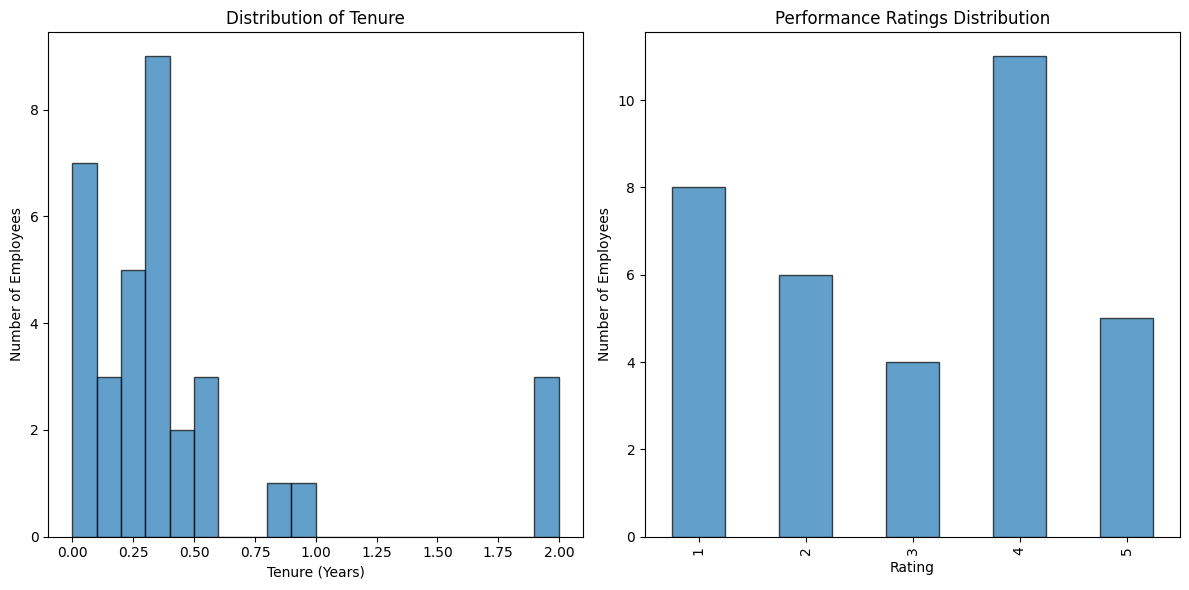

In [350]:
# Plot average tenure
plt.figure(figsize=(12, 6))

# Plot Tenure
plt.subplot(1, 2, 1)
plt.hist(HR_Test_Data['Tenure'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')

# Plot Performance Ratings Distribution
plt.subplot(1, 2, 2)
performance_distribution.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Performance Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Employees')

plt.tight_layout()
plt.show()

In [351]:
#Exploratory Data Analysis (EDA)
# Convert necessary columns to appropriate data types
HR_Test_Data['Date Of Joining'] = pd.to_datetime(HR_Test_Data['Date Of Joining'])
HR_Test_Data['Leaving Date'] = pd.to_datetime(HR_Test_Data['Leaving Date'], errors='coerce')  # Handle missing dates
HR_Test_Data['ANNUAL CTC'] = pd.to_numeric(HR_Test_Data['ANNUAL CTC'], errors='coerce')  # Ensure salary is numeric
HR_Test_Data['Annual Performance Rating (1-5)'] = pd.to_numeric(HR_Test_Data['Annual Performance Rating (1-5)'], errors='coerce')  # Ensure performance is numeric

# 1. Summary Statistics
print("\nSummary Statistics:")
print(HR_Test_Data.describe())



Summary Statistics:
                     Date Of Joining  Annual Performance Rating (1-5)  \
count                             34                        34.000000   
mean   2023-10-05 12:42:21.176470528                         2.970588   
min              2022-04-01 00:00:00                         1.000000   
25%              2023-10-25 00:00:00                         2.000000   
50%              2023-11-21 00:00:00                         3.000000   
75%              2024-01-23 18:00:00                         4.000000   
max              2024-03-19 00:00:00                         5.000000   
std                              NaN                         1.445689   

         ANNUAL CTC                   Leaving Date     Tenure  
count  3.400000e+01                             34  34.000000  
mean   5.378595e+05  2024-03-15 19:03:31.764705792   0.444257  
min    2.263680e+05            2024-03-01 00:00:00   0.000000  
25%    3.278880e+05            2024-03-05 00:00:00   0.157426  
5

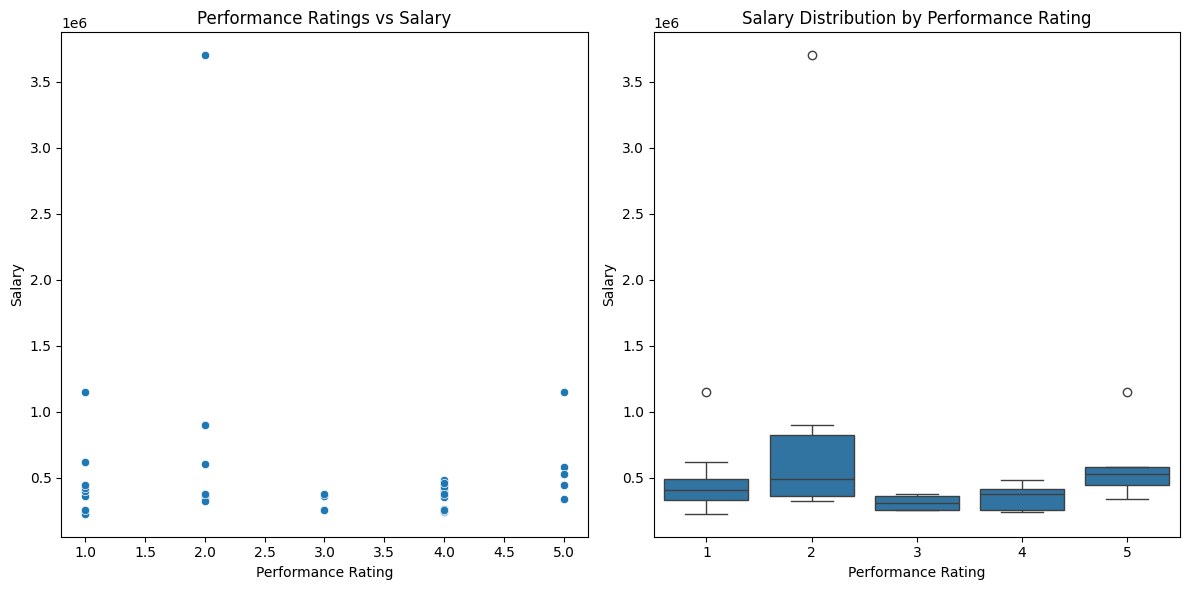

In [352]:
# 2. Visualize Relationship between Performance Ratings and Salary
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Performance Rating (1-5)', y='ANNUAL CTC', data=HR_Test_Data)
plt.title('Performance Ratings vs Salary')
plt.xlabel('Performance Rating')
plt.ylabel('Salary')

# Box plot to see salary distribution by performance rating
plt.subplot(1, 2, 2)
sns.boxplot(x='Annual Performance Rating (1-5)', y='ANNUAL CTC', data=HR_Test_Data)
plt.title('Salary Distribution by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()



Correlation Matrix:
                                 ANNUAL CTC  Annual Performance Rating (1-5)
ANNUAL CTC                         1.000000                        -0.121537
Annual Performance Rating (1-5)   -0.121537                         1.000000


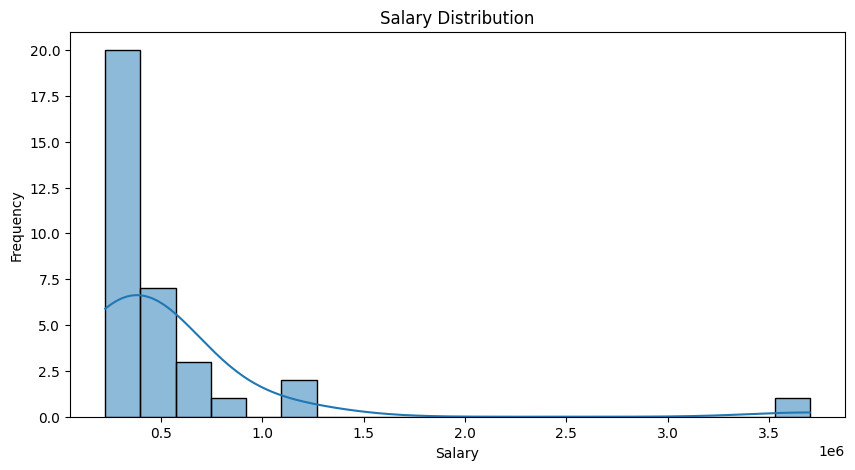

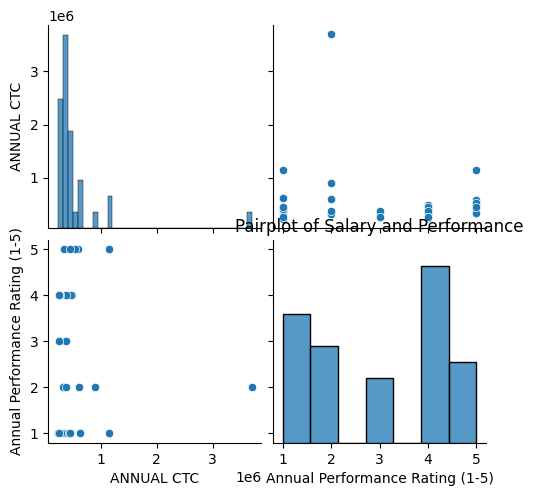

In [353]:
# 3. Calculate Correlation
correlation_matrix = HR_Test_Data[['ANNUAL CTC', 'Annual Performance Rating (1-5)']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Additional EDA: Histograms, Pairplots, etc.
# Histogram of Salary
plt.figure(figsize=(10, 5))
sns.histplot(HR_Test_Data['ANNUAL CTC'].dropna(), bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Pairplot for additional insights
sns.pairplot(HR_Test_Data[['ANNUAL CTC', 'Annual Performance Rating (1-5)']].dropna())
plt.title('Pairplot of Salary and Performance')
plt.show()

In [354]:
# Filter numeric columns
numeric_df = HR_Test_Data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                 Annual Performance Rating (1-5)  ANNUAL CTC  \
Annual Performance Rating (1-5)                         1.000000   -0.121537   
ANNUAL CTC                                             -0.121537    1.000000   
Tenure                                                  0.097713    0.244127   

                                   Tenure  
Annual Performance Rating (1-5)  0.097713  
ANNUAL CTC                       0.244127  
Tenure                           1.000000  


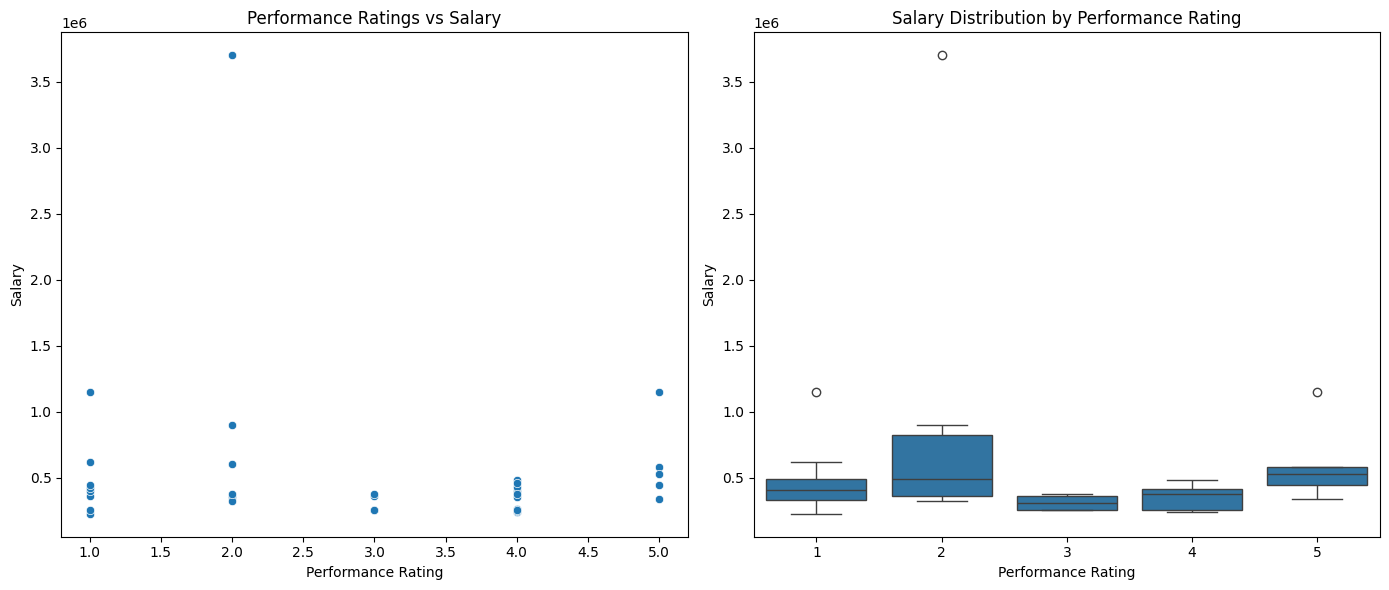

In [355]:
#data Visualization
#Relationship between Performance Ratings and Salary
# Convert necessary columns to appropriate data types
HR_Test_Data['Date Of Joining'] = pd.to_datetime(HR_Test_Data['Date Of Joining'])
HR_Test_Data['Leaving Date'] = pd.to_datetime(HR_Test_Data['Leaving Date'], errors='coerce')  # Handle missing dates
HR_Test_Data['ANNUAL CTC'] = pd.to_numeric(HR_Test_Data['ANNUAL CTC'], errors='coerce')  # Ensure salary is numeric
HR_Test_Data['Annual Performance Rating (1-5)'] = pd.to_numeric(HR_Test_Data['Annual Performance Rating (1-5)'], errors='coerce')  # Ensure performance is numeric

# Create a figure for plots
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Performance Rating (1-5)', y='ANNUAL CTC', data=HR_Test_Data)
plt.title('Performance Ratings vs Salary')
plt.xlabel('Performance Rating')
plt.ylabel('Salary')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Annual Performance Rating (1-5)', y='ANNUAL CTC', data=HR_Test_Data)
plt.title('Salary Distribution by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

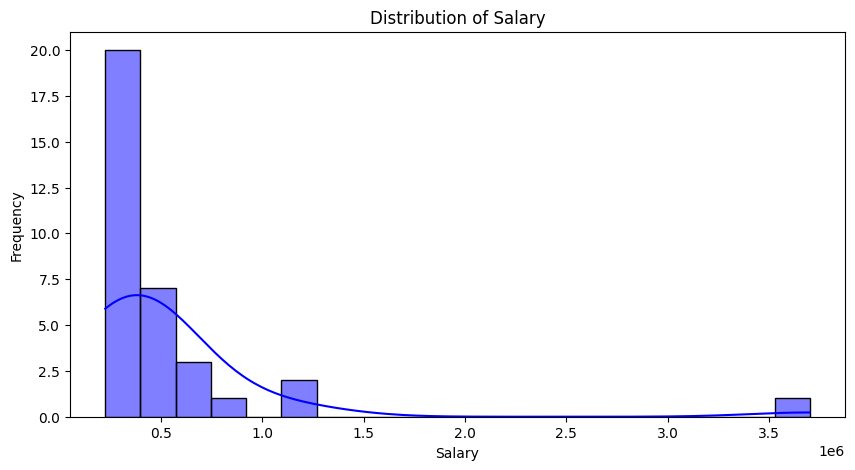

In [356]:
# Distribution of Salary
plt.figure(figsize=(10, 5))
sns.histplot(HR_Test_Data['ANNUAL CTC'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

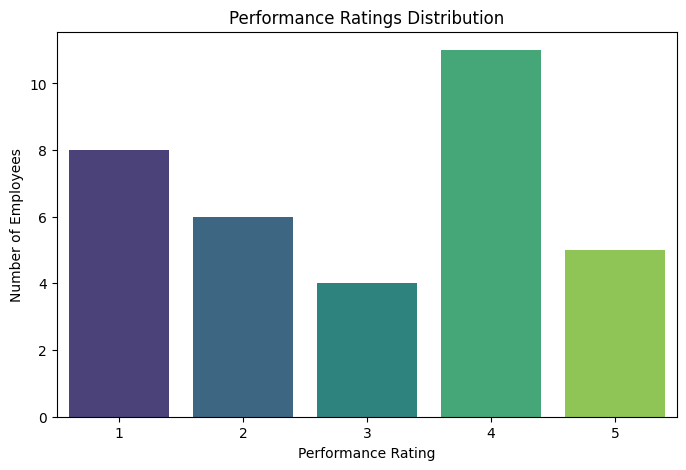

In [357]:
#Distribution of Performance Ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Annual Performance Rating (1-5)', data=HR_Test_Data, palette='viridis')
plt.title('Performance Ratings Distribution')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.show()

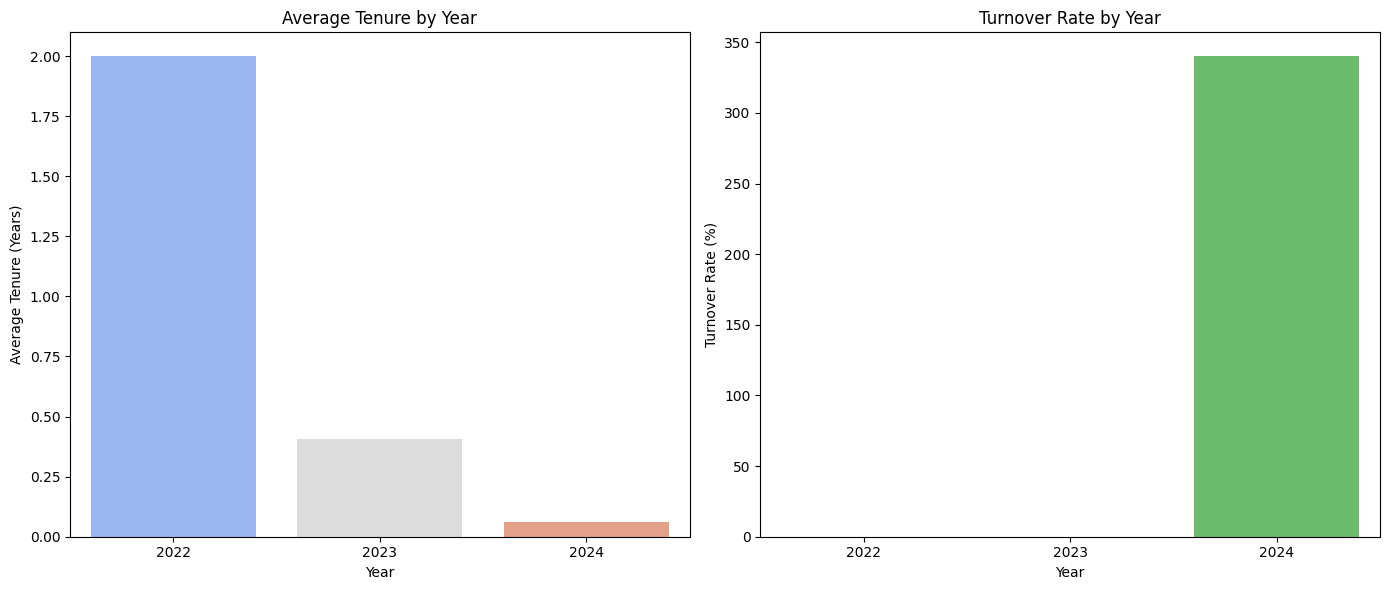

In [362]:
# Convert relevant columns to appropriate data types
HR_Test_Data['Date Of Joining'] = pd.to_datetime(HR_Test_Data['Date Of Joining'])
HR_Test_Data['Leaving Date'] = pd.to_datetime(HR_Test_Data['Leaving Date'], errors='coerce')  # Handle missing dates

# Extract year from the 'date of joining' and 'date of leaving'
HR_Test_Data['Join_Year'] = HR_Test_Data['Date Of Joining'].dt.year
HR_Test_Data['Leave_Year'] = HR_Test_Data['Leaving Date'].dt.year

# Calculate tenure in years
HR_Test_Data['Tenure'] = HR_Test_Data['Leaving Date'].fillna(pd.Timestamp('now')) - HR_Test_Data['Date Of Joining']
HR_Test_Data['Tenure'] = HR_Test_Data['Tenure'].dt.days / 365.25  # Convert days to years

# 1. Calculate Average Tenure by Year
average_tenure_by_year = HR_Test_Data.groupby('Join_Year')['Tenure'].mean().reset_index()
average_tenure_by_year.columns = ['Year', 'Average Tenure']

# 2. Calculate Turnover Rate by Year
# Number of employees who joined each year
join_counts = HR_Test_Data['Join_Year'].value_counts().sort_index()

# Number of employees who left each year
leave_counts = HR_Test_Data['Leave_Year'].value_counts().sort_index()

# Fill missing years in leave_counts
leave_counts = leave_counts.reindex(join_counts.index, fill_value=0)

# Calculate turnover rate
turnover_rate_by_year = (leave_counts / join_counts) * 100
turnover_rate_by_year = turnover_rate_by_year.reset_index()
turnover_rate_by_year.columns = ['Year', 'Turnover Rate']

# Plot Average Tenure by Year
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Year', y='Average Tenure', data=average_tenure_by_year, palette='coolwarm')
plt.title('Average Tenure by Year')
plt.xlabel('Year')
plt.ylabel('Average Tenure (Years)')

# Plot Turnover Rate by Year
plt.subplot(1, 2, 2)
sns.barplot(x='Year', y='Turnover Rate', data=turnover_rate_by_year, palette='viridis')
plt.title('Turnover Rate by Year')
plt.xlabel('Year')
plt.ylabel('Turnover Rate (%)')

plt.tight_layout()
plt.show()


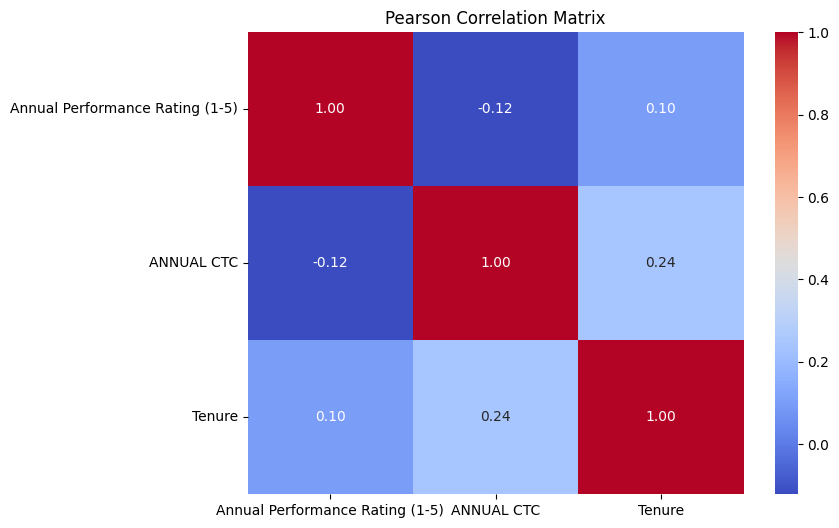

In [359]:
# Heatmap of Pearson Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [360]:
#The End